ADVANCE REGRESSION ASSIGNMENT

HOUSE PRICE PREDICTION


In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
def get_shape(df):
    rows, columns = df.shape
    print(f"The given dataset contains {rows} rows and {columns} columns")

get_shape(housing)

The given dataset contains 1460 rows and 81 columns


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

CHECK FOR MISSING AND DUPLICATE VALUES

In [5]:
def get_missing_values(df):
    return round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

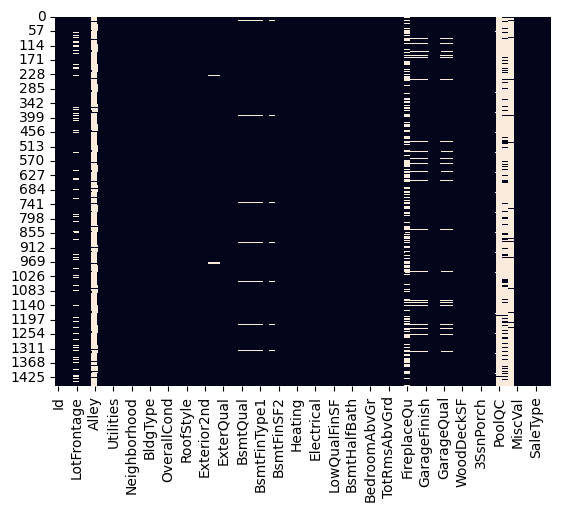

In [6]:
import seaborn as sns
sns.heatmap(housing.isnull(), cbar=False,  cbar_kws={"orientation": "horizontal"})
plt.show()


In [7]:
get_missing_values(housing)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

FROM THE VISUAL, WE  CAN SEE SOME COLUMNS HAVE LOT OF MISSING VALUES WHEREAS OTHERS HAVE DECENT MISSING VALUES. LETS FIND THEM AND DROP

In [8]:
# Check for duplicate rows 
row, column = housing[housing.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


Find Unique values for categorical fields

In [9]:
num = 0
for i in housing.columns:
    if len(housing[i].unique())  == 0:
        num += 1
        print("Feature " + i + " has only one unique value and can be ignored")

if(num == 0):
    print("No columns has only one unique value")

No columns has only one unique value


In [10]:
# Remove columns with more than 80% missing values
housing = housing[housing.columns[housing.isnull().mean() < 0.8]]

Lets check the missing values % again

In [11]:
get_missing_values(housing)

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofMatl          0.00
RoofStyle         0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
Heating           0.00
BsmtFinSF2 

Create a calculated column - PropertyAge, RemodelledAge, GarageAge

In [12]:
housing['PropertyAge'] = housing.YrSold-housing.YearBuilt
housing['RemodelledAge'] = housing.YrSold-housing.YearRemodAdd
housing['GarageAge'] = housing.YrSold - housing.GarageYrBlt

# drop year fields 
housing = housing.drop(['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'Id'], axis='columns')

housing.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,PropertyAge,RemodelledAge,GarageAge
1216,90,RM,68.0,8930,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1.5Fin,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1318,584,0,1902,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,Unf,2,539,TA,TA,Y,0,0,0,0,0,0,0,4,WD,Normal,112000,32,32,32.0
1407,20,RL,NaN,8780,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,3,WD,Normal,112000,24,24,NaN
1206,20,RH,NaN,8900,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,4,4,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,1056,Unf,0,0,1056,GasA,TA,Y,SBrkr,1056,0,0,1056,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,Unf,1,384,TA,TA,Y,0,42,0,0,0,0,0,11,WD,Normal,107000,40,40,40.0
453,60,FV,75.0,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,768,768,GasA,Ex,Y,SBrkr,786,804,0,1590,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,RFn,2,676,TA,TA,Y,0,30,0,0,0,0,0,6,WD,Normal,210000,1,1,1.0
322,60,RL,86.0,10380,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Plywood,Plywood,BrkFace,172.0,Gd,TA,CBlock,TA,TA,Gd,LwQ,28,ALQ,1474,0,1502,GasA,Ex,Y,SBrkr,1553,1177,0,2730,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,Fin,2,576,TA,TA,Y,201,96,0,0,0,0,0,8,WD,Normal,301000,21,20,20.0


Lets map the numeric representation of the categorical values mentioned in the data dictionary using appropriate strings

In [13]:

# mapping numeric representation of categorical values
housing.OverallQual.replace({10:"Very_Excellent", 9:"Excellent", 8:"Very_Good", 7:"Good",6:"Above_Average",5:"Average",4:"Below_Average",3:"Fair",2:"Poor",1:"Very_Poor"},inplace = True)

# mapping numeric representation of categorical values
housing.OverallCond.replace({10:"Very_Excellent", 9:"Excellent", 8:"Very_Good", 7:"Good",6:"Above_Average",5:"Average",4:"Below_Average",3:"Fair",2:"Poor",1:"Very_Poor"},inplace = True)

# mapping numeric representation of categorical values
housing.MoSold.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

In [14]:
get_shape(housing)

The given dataset contains 1460 rows and 75 columns


MISSING VALUE TREATMENT

From the missing value % data, there is a similarity pattern for basement related features and the garage related features. These could be houses **without a basement** or a **garage** or a **masonry veneer**. Hence lets not treat them as a missing value instead a valid record with feature not present.



In [15]:
get_missing_values(housing)

FireplaceQu      47.26
LotFrontage      17.74
GarageAge         5.55
GarageCond        5.55
GarageFinish      5.55
GarageQual        5.55
GarageType        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
LandContour       0.00
RoofMatl          0.00
BsmtFinSF1        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofStyle         0.00
Utilities         0.00
OverallCond       0.00
MSZoning          0.00
BsmtUnfSF         0.00
LotArea           0.00
OverallQual       0.00
HouseStyle        0.00
Street            0.00
LotShape          0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
BsmtFinSF2        0.00
CentralAir        0.00
TotalBsmtSF       0.00
ScreenPorch       0.00
GarageArea 

In [16]:
# Missing value imputation for categorical fields (for fields missing percent between 0 - 50%)
missing_feats_cat=[]
for feature in housing:
    if housing[feature].dtype == 'O'and np.round((housing[feature].isnull().mean()*100),2)<=50.0 and np.round((housing[feature].isnull().mean()*100),2)>0.0:
        missing_feats_cat.append(str(feature))

# we have checked for categorical fields and added the fields with missing value in the missing_feats_cat list
# we are imputing the missing categorical fields with the mode

for feature in missing_feats_cat:
    housing[""+feature+""].fillna(housing[""+feature+""].mode()[0],inplace=True)
    print(f"The Column {feature}' has {np.round((housing[feature].isnull().mean()*100),2)}% missing values")

The Column MasVnrType' has 0.0% missing values
The Column BsmtQual' has 0.0% missing values
The Column BsmtCond' has 0.0% missing values
The Column BsmtExposure' has 0.0% missing values
The Column BsmtFinType1' has 0.0% missing values
The Column BsmtFinType2' has 0.0% missing values
The Column Electrical' has 0.0% missing values
The Column FireplaceQu' has 0.0% missing values
The Column GarageType' has 0.0% missing values
The Column GarageFinish' has 0.0% missing values
The Column GarageQual' has 0.0% missing values
The Column GarageCond' has 0.0% missing values


Lets again check for missing values

We can see some of the numeric columns still have missin value , we will check the descriptive stats of these columns and handle the treatment

In [17]:
get_missing_values(housing)

LotFrontage      17.74
GarageAge         5.55
MasVnrArea        0.55
BsmtCond          0.00
Exterior2nd       0.00
MasVnrType        0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtExposure      0.00
RoofMatl          0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Exterior1st       0.00
RoofStyle         0.00
HeatingQC         0.00
LotConfig         0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LandSlope         0.00
OverallCond       0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
Heating           0.00
CentralAir        0.00
RemodelledAge     0.00
GarageCars        0.00
GarageQual        0.00
GarageCond        0.00
PavedDrive        0.00
WoodDeckSF 

**Imputation on numeric columns.** 

- The descriptive statistics for LotFrontage shows that the mean and median is close, hence we can impute with the median
- The stats for MasVnrArea and GarageAge shows 0 in the median, which means most of the housses dont have a garage and a masonry veneer, which means it is not missing rather it is not applicable.Hence we can fill those values with the most common occurence of the feature or mode to impute

In [18]:
housing[ ['LotFrontage', 'MasVnrArea', 'GarageAge'] ].describe([0.25,0.50,0.75,0.99])

,LotFrontage,MasVnrArea,GarageAge
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,29.306019
std,24.284752,181.066207,24.726881
min,21.000000,0.000000,0.000000
25%,59.000000,0.000000,6.000000
50%,69.000000,0.000000,28.000000
75%,80.000000,166.000000,47.000000
99%,141.000000,791.920000,90.220000
max,313.000000,1600.000000,107.000000


In [19]:
# Now we have done the missing value imputation for LotFrontage
housing['LotFrontage'].fillna(housing['LotFrontage'].median(),inplace=True)
housing.MasVnrArea.fillna(housing.MasVnrArea.mode()[0],inplace=True)
housing.GarageAge.fillna(housing.GarageAge.mode()[0],inplace=True)

housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,PropertyAge,RemodelledAge,GarageAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,feb,WD,Normal,208500,5,5,5.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above_Average,Very_Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,may,WD,Normal,181500,31,31,31.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,sept,WD,Normal,223500,7,6,7.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,feb,WD,Abnorml,140000,91,36,8.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very_Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,dec,WD,Normal,250000,8,8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Above_Average,Average,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,aug,WD,Normal,175000,8,7,8.0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Above_Average,Above_Average,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,feb,WD,Normal,210000,32,22,32.0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Excellent,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,may,WD,Normal,266500,69,4,69.0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Average,Above_Average,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Gd,Attchd,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,apr,WD,Normal,142125,60,14,60.0


In [20]:
get_missing_values(housing)

GarageAge        0.0
RoofMatl         0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Exterior1st      0.0
RoofStyle        0.0
HeatingQC        0.0
OverallCond      0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
Heating          0.0
CentralAir       0.0
RemodelledAge    0.0
GarageCars       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch  

With the above cleaned data, we segregate the numerical and categorical features

In [21]:
## Identifying categorical and numeric featuers

categorical = [
'MSSubClass', 'Street', 'Street', 'LandContour', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood','Condition1','Condition2', 'BldgType', 'HouseStyle','OverallQual', 'RoofStyle',
'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir',
'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'
 ]


numerical = [
'LotFrontage', 'LotArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


 

**UNIVARIATE ANALYSIS**

Analysis on Targe Variable SalePrice

In [22]:
def create_dist_box_plot(data, column_name, description):
    '''
    A re-usable function which creates a distribution plot
    and a box plot for numeric values. This will be used
    in our univariate analysis
    '''
    # sets the figure size and back ground style
    plt.figure(figsize=(15,8),facecolor='c')
    sns.set_style("dark")
    # plots the distribution plot on loan amount
    plt.subplot(2, 2, 1)
    ax = sns.distplot(data[column_name],rug = True)
    ax.set_title(f'{description} - Distribution Plot',fontsize=16, color='w')
    ax.set_xlabel(description,fontsize=14,color='w')

    # plots the box plot on loan amount
    plt.subplot(2, 2, 2)
    ax = sns.boxplot(x=data[column_name])
    ax.set_title(f'{description} - Box Plot', fontsize=16, color='w')
    ax.set_ylabel(description,fontsize=14,color='w')
    plt.show()

Text(0.5, 1.0, 'DISTRIBUTION -TARGET ')

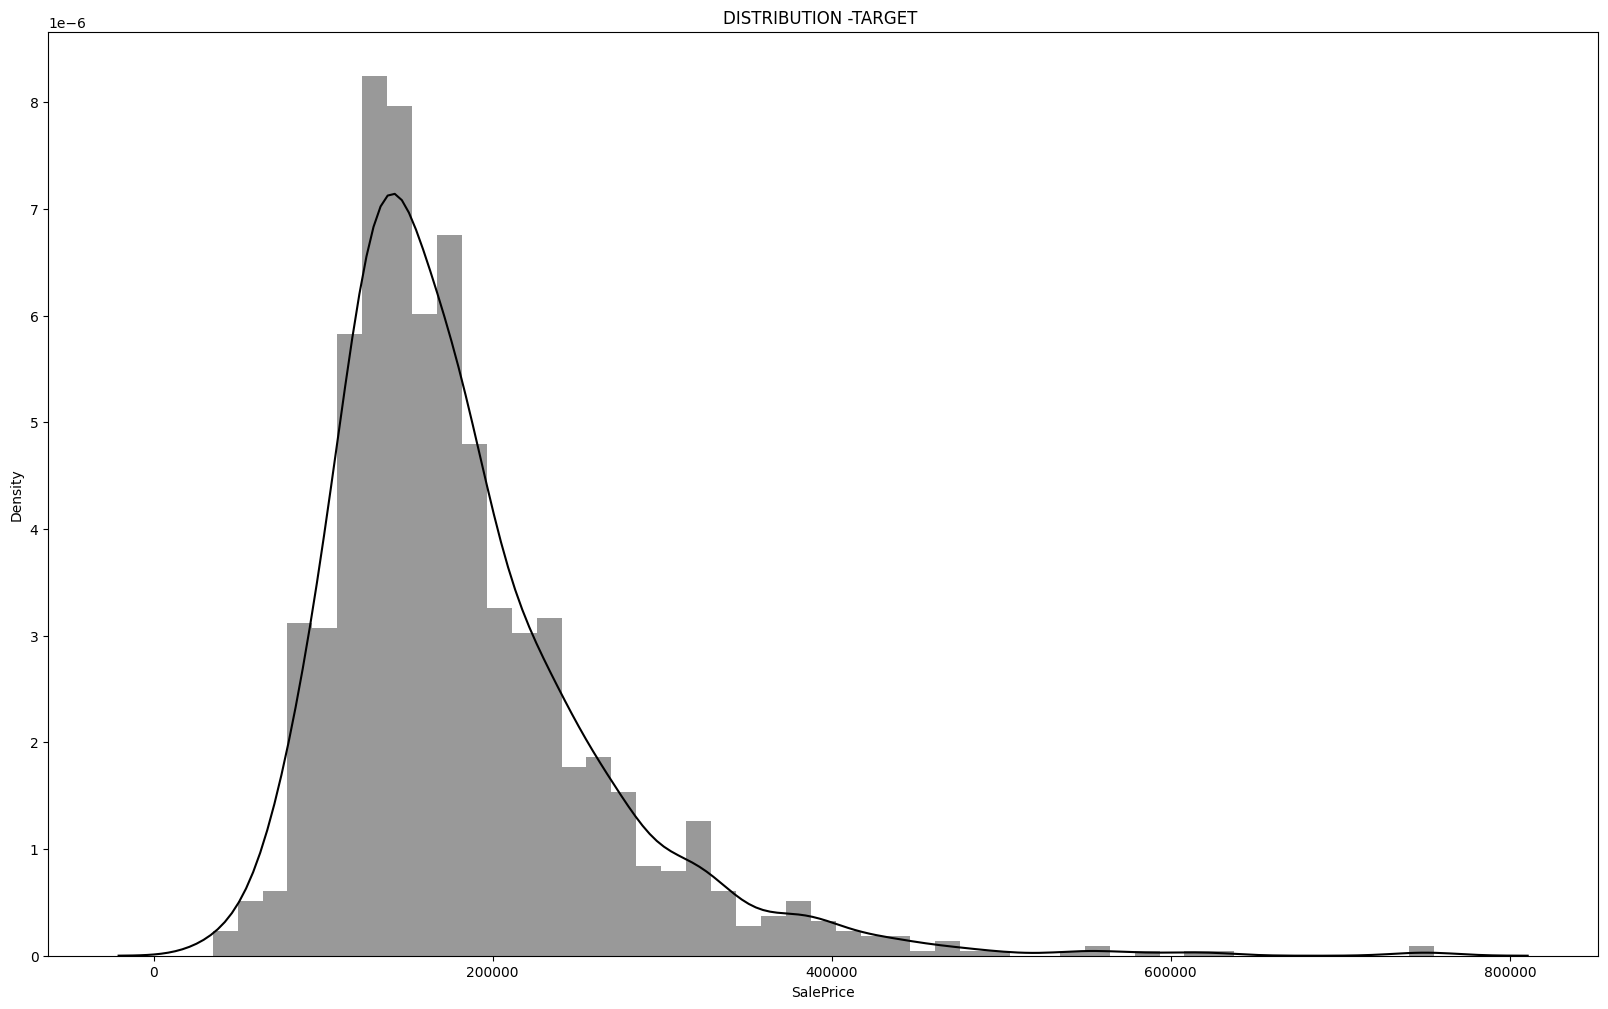

In [23]:
plt.figure(figsize=(20,12))
ax = sns.distplot(housing['SalePrice'], color='black')
ax.set_title('DISTRIBUTION -TARGET ')

We can see right skew hence since its target variable ,we will apply log of target value and reassign to make it normal distribution to make it fairly closely to normal distribution

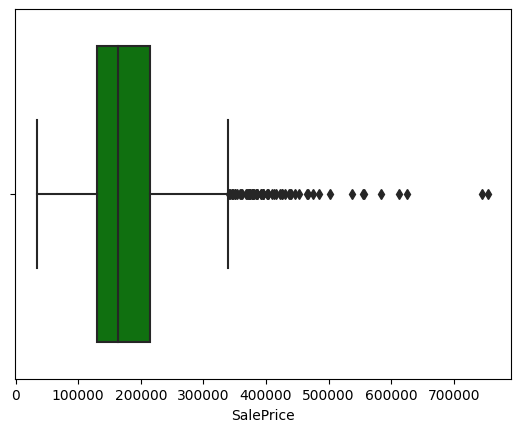

In [24]:

sns.boxplot(x=housing['SalePrice'], color='green')

Box plotting the numerical features to check the distribution

In [25]:
import seaborn as sns

def plot_numeric_cols():
    fig = plt.figure(figsize=(26,30))
    spec = fig.add_gridspec(10,4)
    sec=[]
    cnt=0
    spec.update(wspace=0.2, hspace=0.3)


    sec_01 = fig.add_subplot(spec[0,0])
    sec_02 = fig.add_subplot(spec[0,1])
    sec_03 = fig.add_subplot(spec[0,2])
    sec_04 = fig.add_subplot(spec[0,3])
    sec_05 = fig.add_subplot(spec[1,0])
    sec_06 = fig.add_subplot(spec[1,1])
    sec_07 = fig.add_subplot(spec[1,2])
    sec_08 = fig.add_subplot(spec[1,3])
    sec_09 = fig.add_subplot(spec[2,0])
    sec_10 = fig.add_subplot(spec[2,1])
    sec_11 = fig.add_subplot(spec[2,2])
    sec_12 = fig.add_subplot(spec[2,3])
    sec_13 = fig.add_subplot(spec[3,0])
    sec_14 = fig.add_subplot(spec[3,1])
    sec_15 = fig.add_subplot(spec[3,2])
    sec_16 = fig.add_subplot(spec[3,3])
    sec_17 = fig.add_subplot(spec[4,0])
    sec_18 = fig.add_subplot(spec[4,1])
    sec_19 = fig.add_subplot(spec[4,2])
    sec_20 = fig.add_subplot(spec[4,3])
    sec_21 = fig.add_subplot(spec[5,0])
    sec_22 = fig.add_subplot(spec[5,1])
    sec_23 = fig.add_subplot(spec[5,2])
    sec_24 = fig.add_subplot(spec[5,3])
    sec_25 = fig.add_subplot(spec[6,0])
    sec_26 = fig.add_subplot(spec[6,1])
    sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24,sec_25,sec_26]



    cnt = 0
    for feature in numerical:
        if housing[feature].dtype=='O' or feature=='SalePrice':
            continue
        else:

            sns.boxplot(x=housing[feature], ax=sec[cnt],   palette=['#AECB46', "#FF4C33"])
            cnt+=1

Number of years ago Garage built in the data is around 15-45yr

Number of years ago House built in the data is around 15-58yr

Most people have garage cars from 1-2

**OUTLIER REMOVAL USING IQR**

In [26]:

for feature in numerical:
    if housing[feature].dtype!='O' and len(housing[feature].unique())>2:
        lower_quartile = housing[feature].quantile(0.25)
        upper_quartile = housing[feature].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)
        
        housing[feature] = np.where(housing[feature]>upper_fence, 
                                upper_fence,   
                                housing[feature])
        
        housing[feature] = np.where(housing[feature]<lower_fence,
                               lower_fence,
                               housing[feature])

Plotting after outlier removal and seeing clear box plots

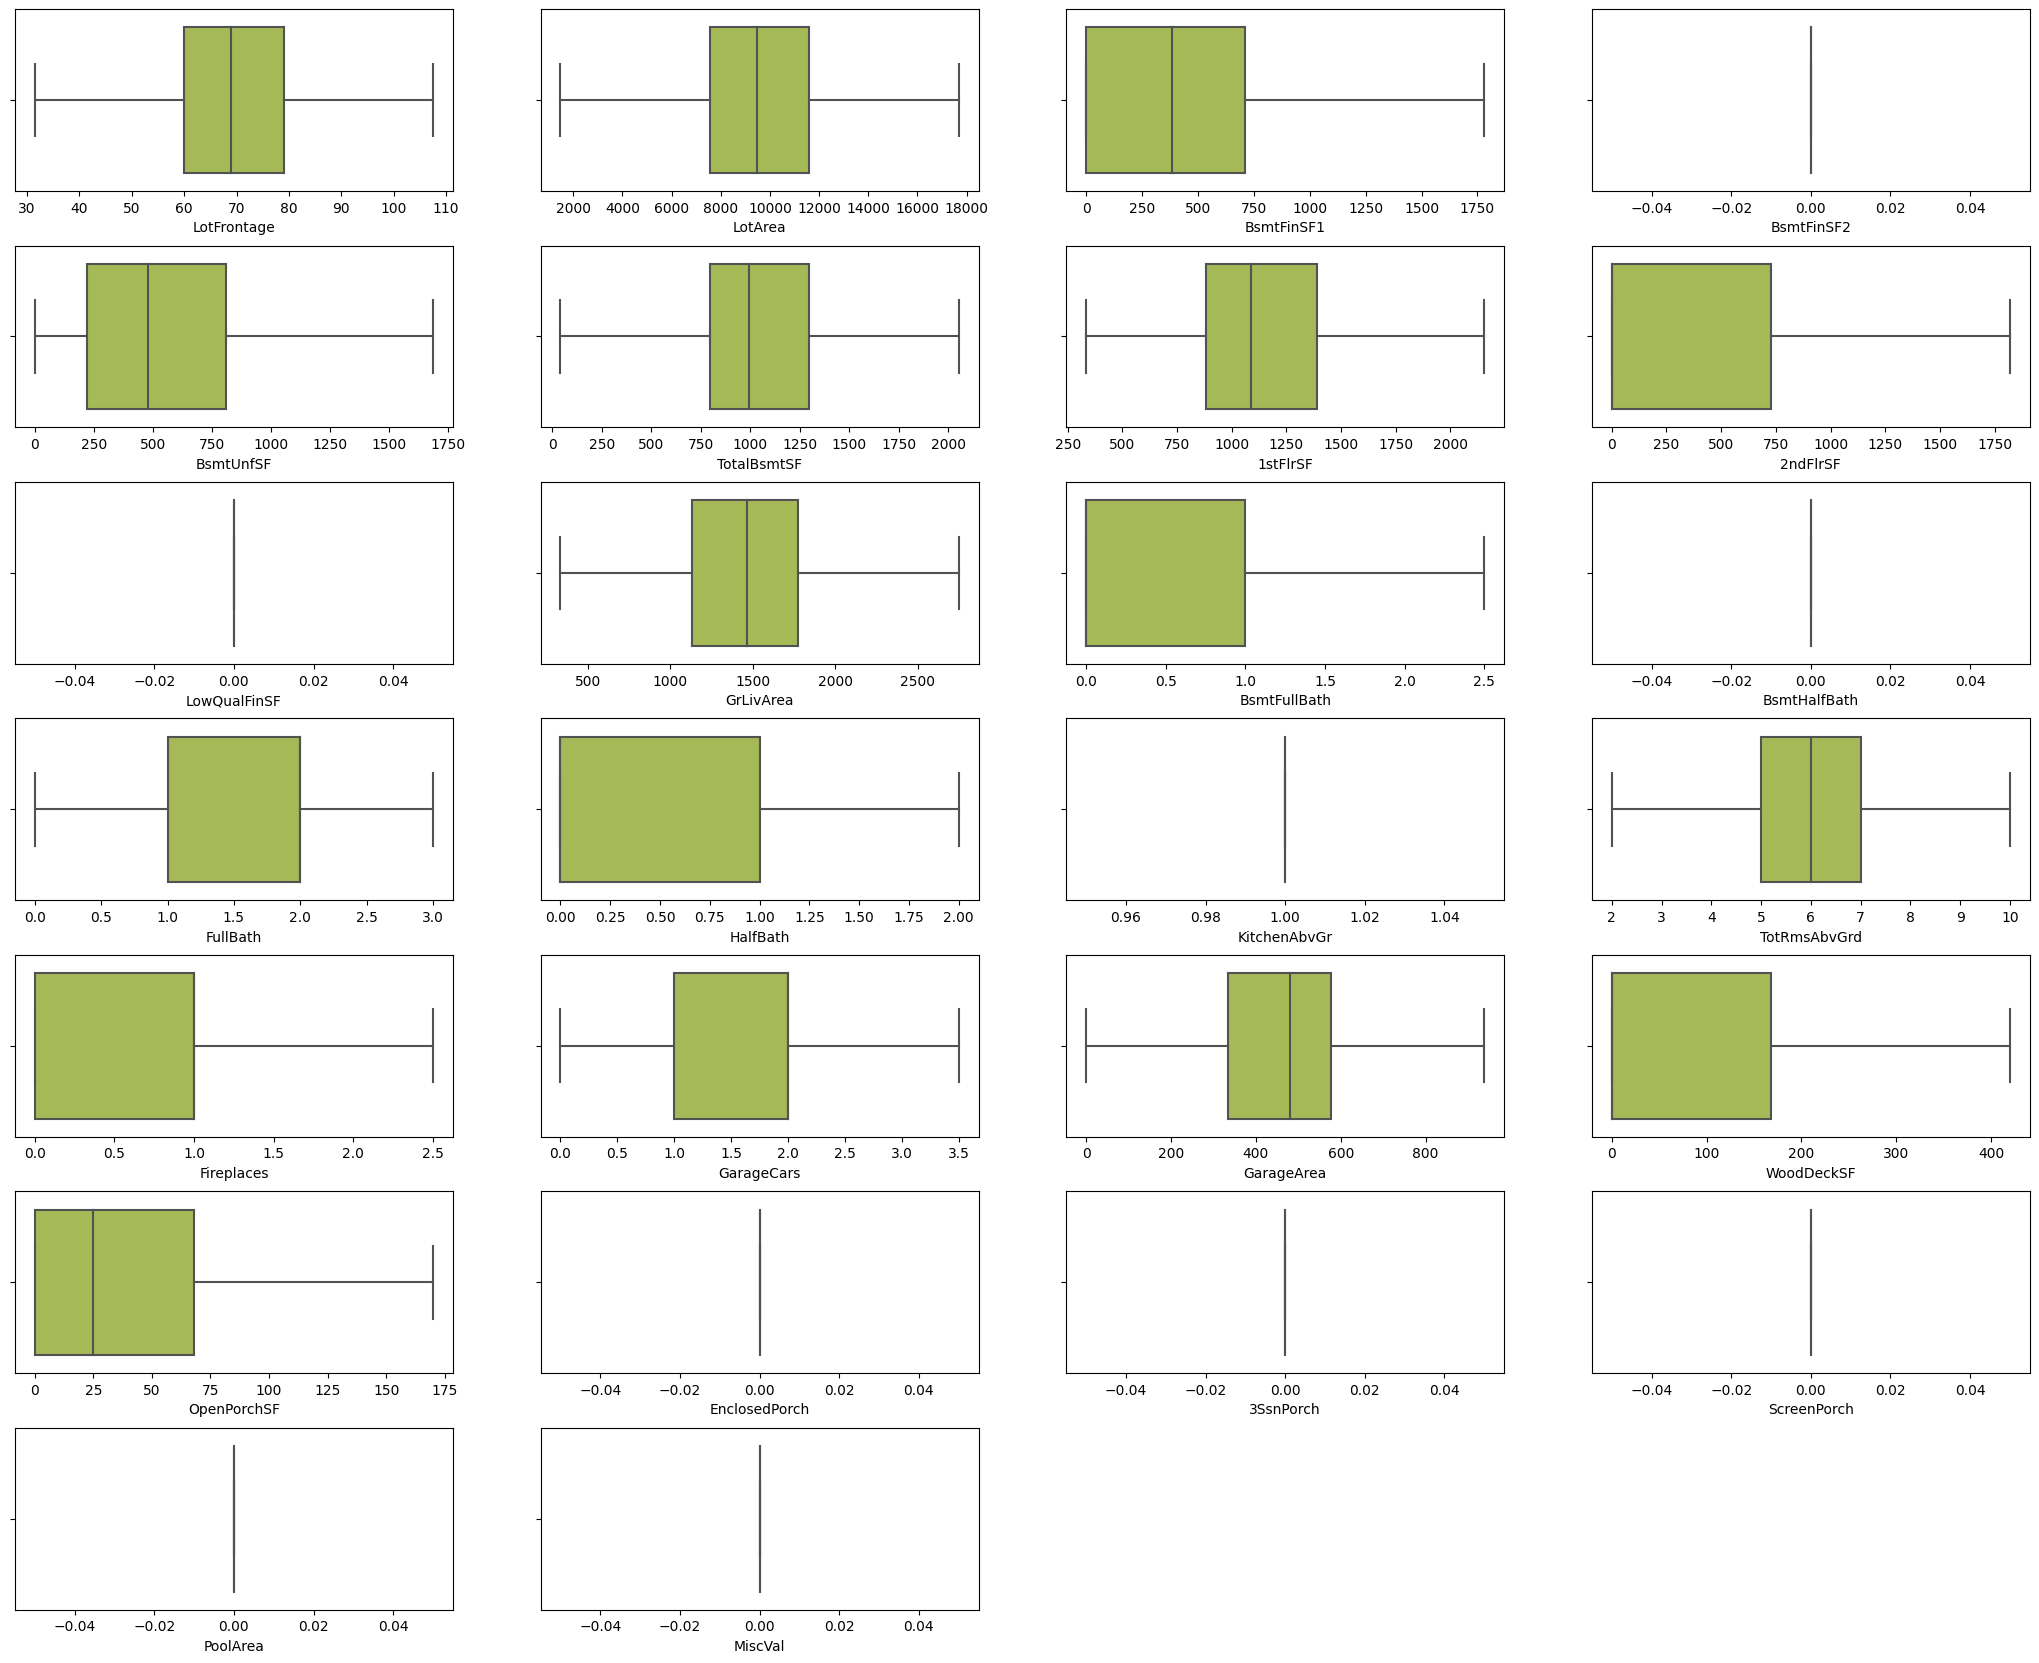

In [27]:
plot_numeric_cols()

**BIVARIATE ANALYSIS**

we will do bivariate analysis against our target SalePrice

In [28]:
def create_bivariate_plots(housing, features):

    '''
    A re-usable function to crate bivariate plots like line graph and bar graph
    @param housing - dataframe for creating plots
    @param features - columns for which we need to create plots against the target variable
    The function creates line graph for numerical predictors and bar graph for categorical predictors

    '''

    import seaborn as sns
    fig = plt.figure(figsize=(26,30))
    spec = fig.add_gridspec(10,4)


    spec.update(wspace=0.2, hspace=0.3)
    sec = []
    counter = 0
    # create a list of sub plot sections based on the number of features inputed to the function
    for i in range( round( len(features)/4 ) ):
        for j in range(4):
            sec.append(fig.add_subplot(spec[i,j]))
            counter = counter+1
            if counter == len(features) :
                break

    
    cnt = 0
    for feature in features:
        if feature!='SalePrice':
            if housing[feature].dtype!='O':
                sns.lineplot(data= housing,x= housing[feature],y='SalePrice', 
                            ax=sec[cnt],
                            palette=['#AECB46', "#FF4C33"])
            else:
                sns.barplot(data =housing, 
                            x=housing[feature],
                            y='SalePrice', 
                            ax=sec[cnt],
                            palette=['#AECB46', "#FF4C33"])
        cnt=cnt+1


Creating Bivariate analysis plots for numerical columns against our target Sale Price

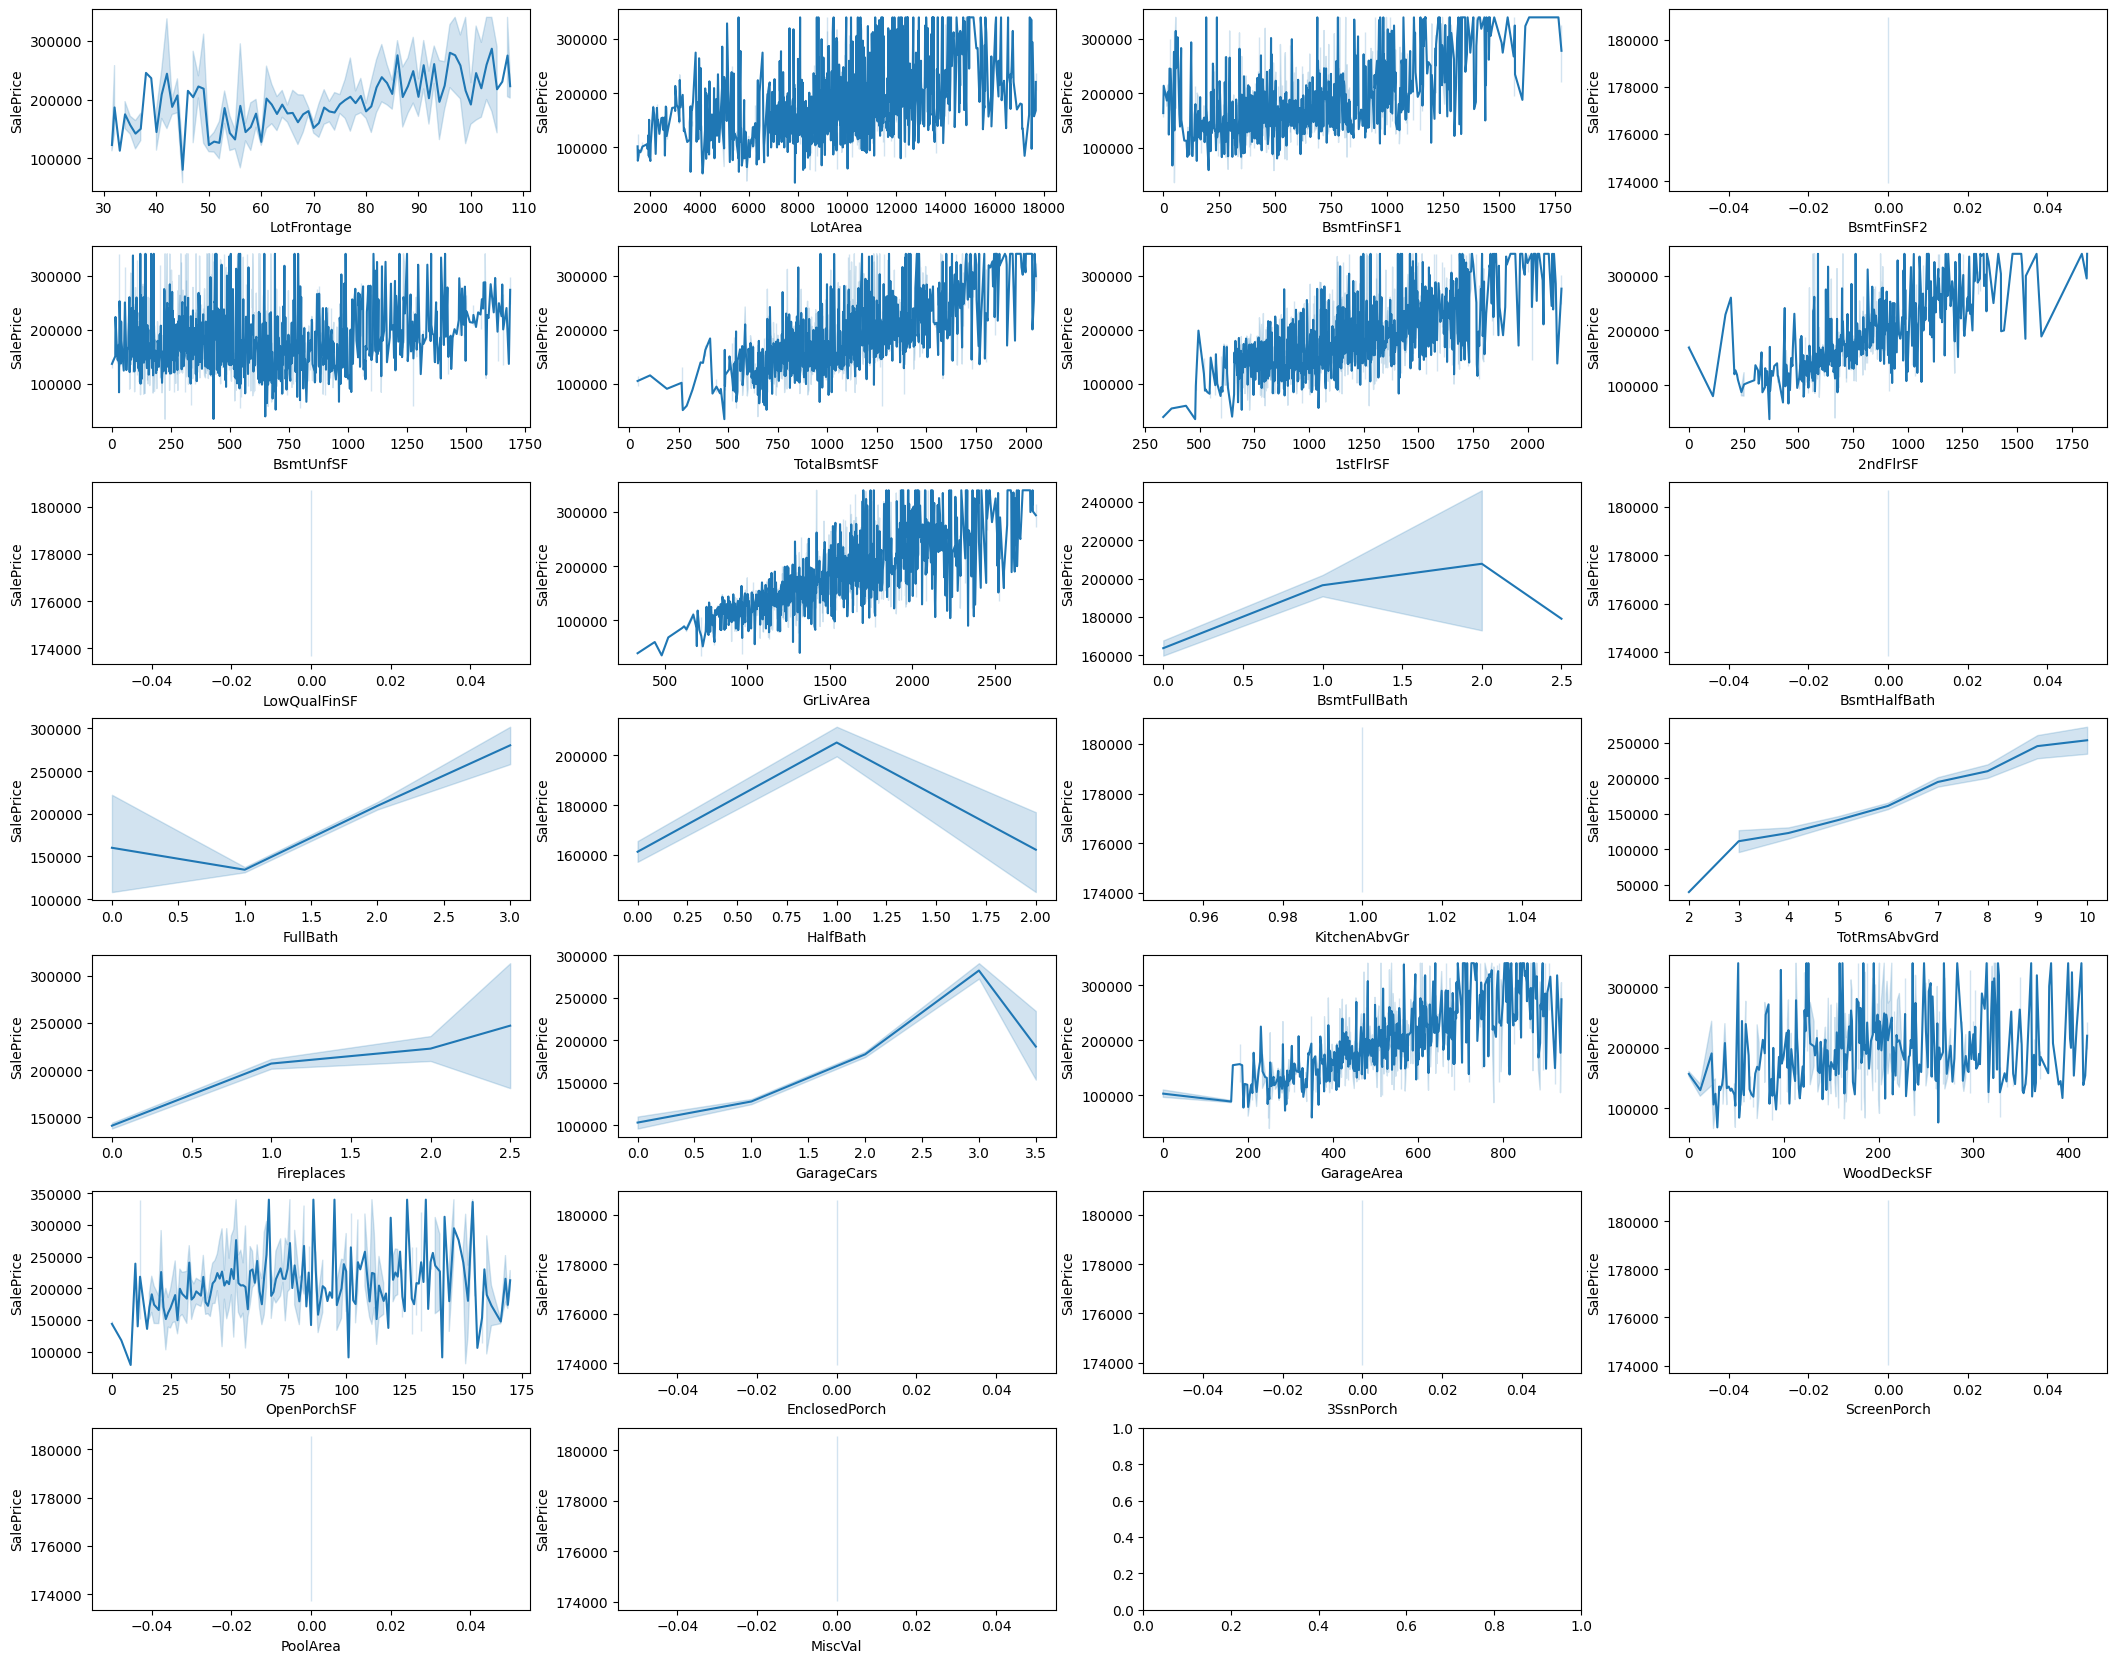

In [29]:

create_bivariate_plots(housing, numerical)

Creating Bivariate plots (bar graphs) for categorical fields against the target variable sale price

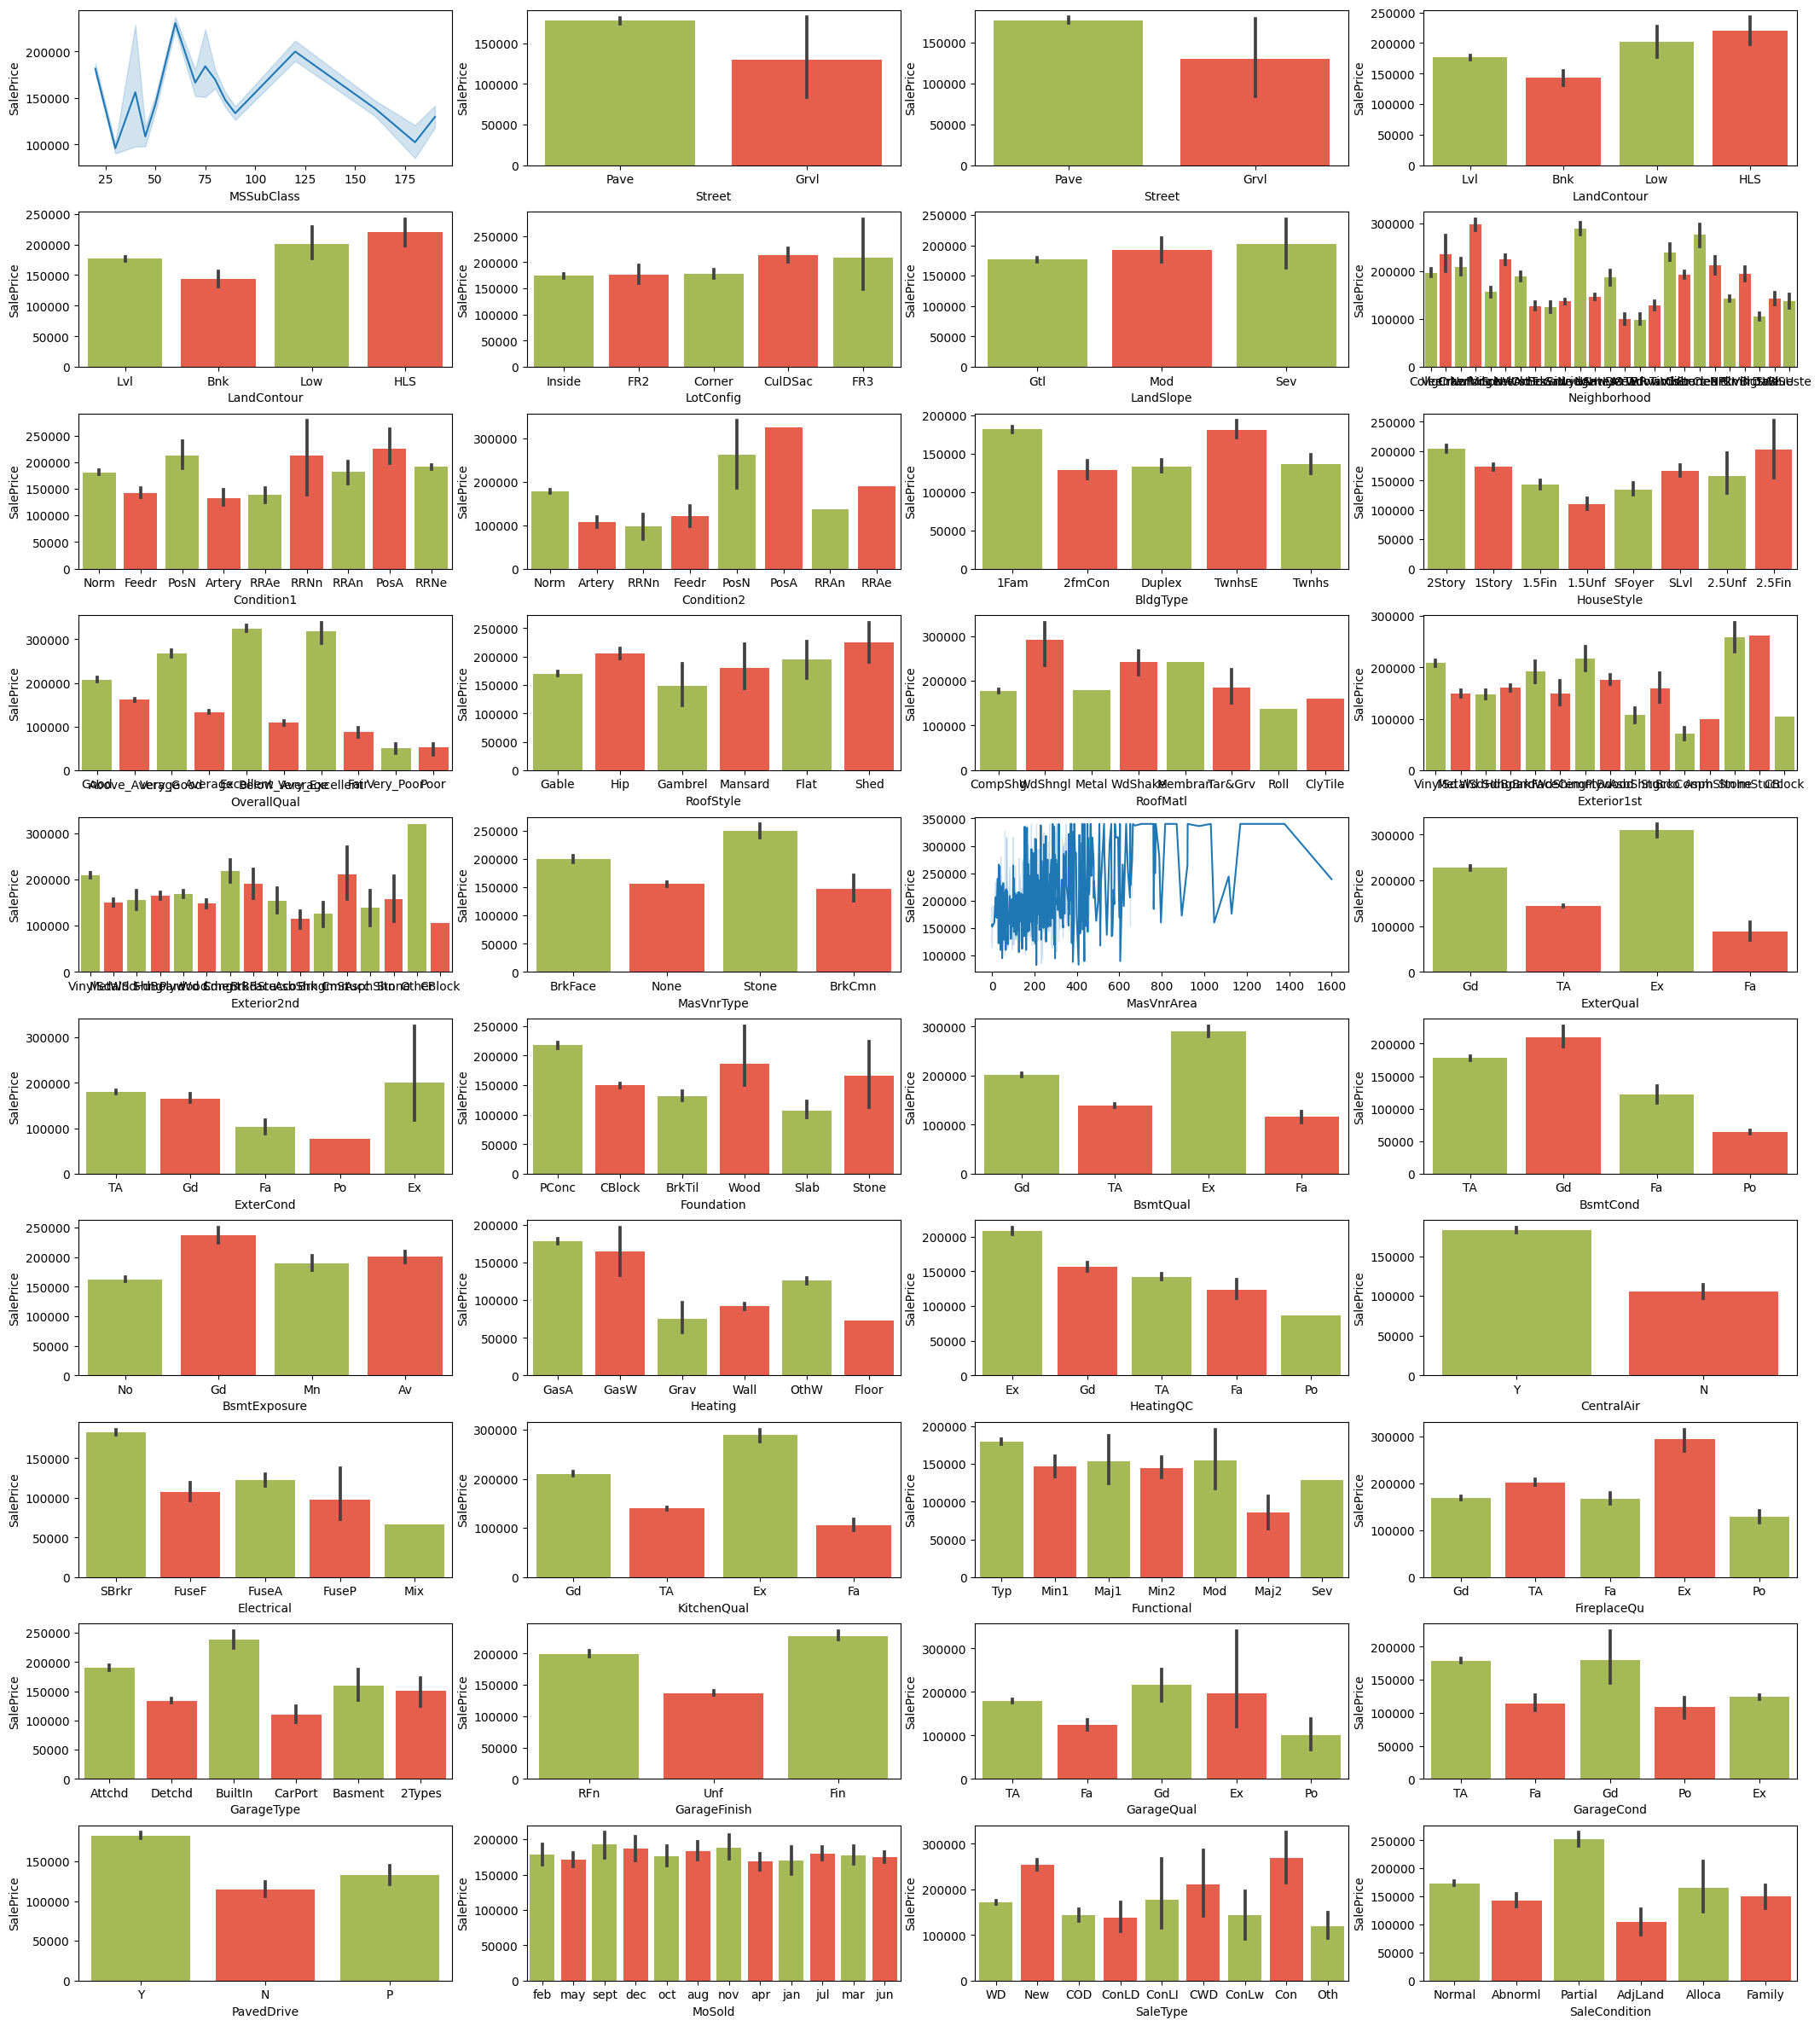

In [30]:

create_bivariate_plots(housing, categorical)

Descriptive stats on the target variable

**CONCLUSION OF BIVARIATE**

- Features representing the  Lot Frontage, Lot Area, Basement square feet, first floor sq ft, second floor sq ft, garage area shows a linear relation with the sale price . larger the area, larger the price, which is also clear from our business knowledge

- Streets with pave (if a house has road access) has a higher price

- KitchenQual Excellent has greater price

- MSZoning shows Residential Low Density and Floating Village Residential have higher price than Commerical place

- If home is very new "Home was not completed when last assessed" then price is higher found from SaleCondition feature

- If house has Roof of shed it has higher price


**MULTIVARIATE ANALYSIS**

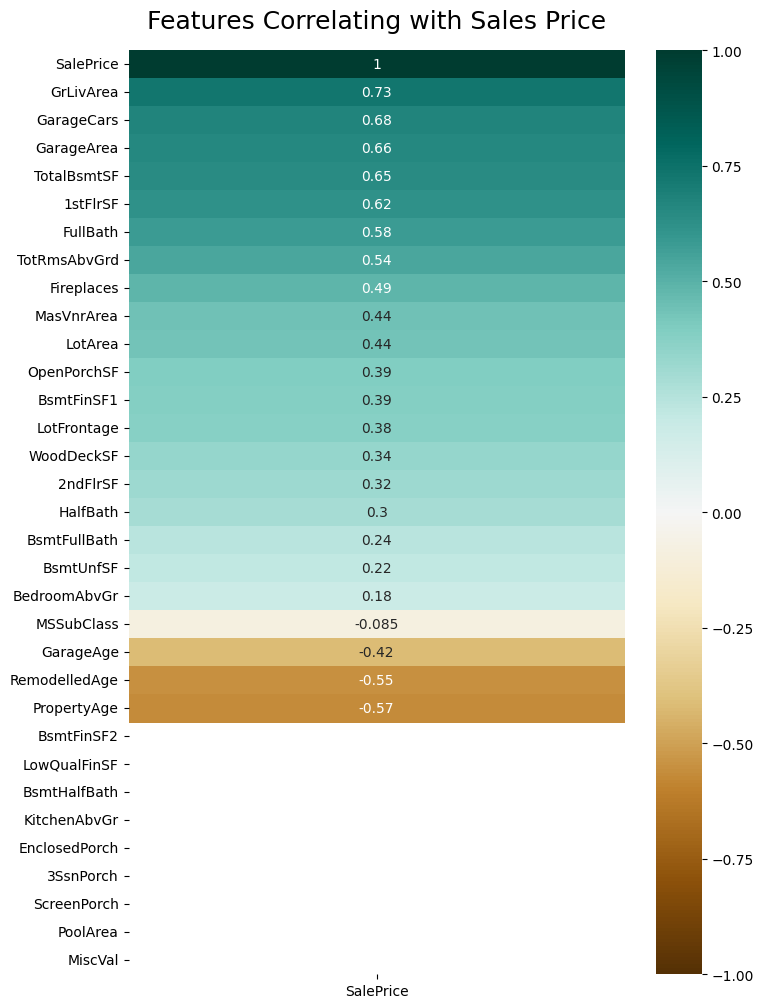

In [31]:
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(housing.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

**CONCLUSION OF MULTIVARIATE ANALYSIS**

GrLivArea ,GarageCars ,GarageArea, TotalBSMTSF, 1st Flr SF and Full Bath have greater influence on target variable Sale Price

**MODEL BUILDING AND EVALUATION**

Create Dummies

In [32]:
housing = pd.get_dummies(housing, drop_first=True)
housing.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,RemodelledAge,GarageAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sept,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3,1.0,8.0,0.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,208500.0,5,5,5.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,0.0,2.0,0.0,3,1.0,6.0,1.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,181500.0,31,31,31.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3,1.0,6.0,1.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,223500.0,7,6,7.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3,1.0,7.0,1.0,3.0,642.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,140000.0,91,36,8.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4,1.0,9.0,1.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,250000.0,8,8,8.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [33]:
data_train, data_test = train_test_split(housing, train_size = 0.70, test_size = 0.30, random_state = 43)

In [34]:
rows, columns = data_train.shape
print(f'The encoded feature train dataset has {rows} rows and {columns} columns')
rows, columns = data_test.shape
print(f'The encoded feature test dataset has {rows} rows and {columns} columns')

The encoded feature train dataset has 1021 rows and 261 columns
The encoded feature test dataset has 438 rows and 261 columns


SCALING FEATURES

Scaling the numeric variables

In [35]:
scaler = StandardScaler()
data_train[numerical] = scaler.fit_transform(data_train[numerical])
data_train.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,RemodelledAge,GarageAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sept,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
760,20,0.041697,-0.138854,0.0,0.392766,0.0,-0.702962,-0.465774,-0.814293,-0.794385,0.0,-1.366343,-0.818824,0.0,-1.030080,-0.751491,2,0.0,-0.971436,-0.970087,-1.013967,-0.804311,-0.782571,-0.817439,0.0,0.0,0.0,0.0,0.0,-0.753997,50,50,1.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1011,90,0.329931,0.064051,0.0,-1.032478,0.0,-1.286875,-2.560079,1.420488,-0.794385,0.0,0.347918,-0.818824,0.0,0.783216,-0.751491,4,0.0,1.010915,-0.970087,-2.356717,-2.255506,-0.782571,-0.817439,0.0,0.0,0.0,0.0,0.0,-1.171177,45,45,1.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
200,20,0.618166,-0.293901,0.0,-1.032478,0.0,1.310609,0.189015,-0.096370,-0.794385,0.0,-0.815637,-0.818824,0.0,0.783216,-0.751491,2,0.0,-0.971436,-0.970087,0.328783,-0.127086,0.361576,0.403357,0.0,0.0,0.0,0.0,0.0,-0.564369,7,6,7.0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
424,20,0.156991,-0.166840,74.0,0.402081,0.0,0.057051,0.380101,0.113141,-0.794385,0.0,-0.654925,1.123149,0.0,-1.030080,-0.751491,2,0.0,-0.310652,0.593384,-1.013967,-0.818823,-0.782571,0.021859,0.0,0.0,0.0,0.0,0.0,-0.579540,52,52,52.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1385,50,-1.687712,-1.164290,0.0,0.679212,0.0,-1.145531,-0.639025,-1.004249,0.028051,0.0,-0.744923,1.123149,0.0,-1.030080,-0.751491,3,0.0,0.350131,-0.970087,-1.013967,-1.094550,-0.782571,1.013756,0.0,0.0,0.0,0.0,0.0,-0.784337,88,3,88.0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [36]:
data_test[numerical] = scaler.fit_transform(data_test[numerical])
data_test.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,RemodelledAge,GarageAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sept,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
860,50,-0.804258,-0.582831,0.0,-0.981386,0.0,0.762774,-0.358628,-0.669907,0.379668,0.0,-0.160980,-0.830209,0.0,-1.014485,1.165977,3,0.0,0.29602,0.64551,-1.069612,-1.276357,-0.800064,2.429531,0.0,0.0,0.0,0.0,0.0,0.175004,89,9,82.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1146,20,0.022447,0.394631,85.0,1.868557,0.0,-1.258812,0.582988,0.366332,-0.797696,0.0,-0.410018,1.083641,0.0,0.806599,-0.783252,3,0.0,-0.95068,0.64551,0.286365,-0.375663,0.581321,-0.306180,0.0,0.0,0.0,0.0,0.0,0.033075,21,21,21.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1092,50,-0.509006,-0.374591,0.0,-0.023099,0.0,0.405751,0.297576,0.613312,-0.101356,0.0,0.360443,-0.830209,0.0,0.806599,-0.783252,4,0.0,0.29602,0.64551,0.286365,0.457599,2.063169,-0.800128,0.0,0.0,0.0,0.0,0.0,-0.587417,83,58,83.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1018,80,0.022447,0.280347,76.0,-0.981386,0.0,-0.461306,-1.646642,-0.965208,0.737000,0.0,-0.071482,-0.830209,0.0,0.806599,1.165977,3,0.0,0.29602,0.64551,0.286365,-0.380479,0.572949,-0.800128,0.0,0.0,0.0,0.0,0.0,-0.252208,16,15,16.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
628,60,0.081498,0.506168,192.0,0.491160,0.0,-0.447396,-0.046382,-0.326283,1.584519,0.0,1.111447,-0.830209,0.0,-1.014485,3.115206,5,0.0,1.54272,2.21625,0.286365,0.110808,2.004565,-0.800128,0.0,0.0,0.0,0.0,0.0,-0.608813,38,38,38.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [37]:
y_train = data_train.pop('SalePrice')
X_train = data_train

X_train

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,PropertyAge,RemodelledAge,GarageAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sept,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
760,20,0.041697,-0.138854,0.0,0.392766,0.0,-0.702962,-0.465774,-0.814293,-0.794385,0.0,-1.366343,-0.818824,0.0,-1.030080,-0.751491,2,0.0,-0.971436,-0.970087,-1.013967,-0.804311,-0.782571,-0.817439,0.0,0.0,0.0,0.0,0.0,50,50,1.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1011,90,0.329931,0.064051,0.0,-1.032478,0.0,-1.286875,-2.560079,1.420488,-0.794385,0.0,0.347918,-0.818824,0.0,0.783216,-0.751491,4,0.0,1.010915,-0.970087,-2.356717,-2.255506,-0.782571,-0.817439,0.0,0.0,0.0,0.0,0.0,45,45,1.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
200,20,0.618166,-0.293901,0.0,-1.032478,0.0,1.310609,0.189015,-0.096370,-0.794385,0.0,-0.815637,-0.818824,0.0,0.783216,-0.751491,2,0.0,-0.971436,-0.970087,0.328783,-0.127086,0.361576,0.403357,0.0,0.0,0.0,0.0,0.0,7,6,7.0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
424,20,0.156991,-0.166840,74.0,0.402081,0.0,0.057051,0.380101,0.113141,-0.794385,0.0,-0.654925,1.123149,0.0,-1.030080,-0.751491,2,0.0,-0.310652,0.593384,-1.013967,-0.818823,-0.782571,0.021859,0.0,0.0,0.0,0.0,0.0,52,52,52.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1385,50,-1.687712,-1.164290,0.0,0.679212,0.0,-1.145531,-0.639025,-1.004249,0.028051,0.0,-0.744923,1.123149,0.0,-1.030080,-0.751491,3,0.0,0.350131,-0.970087,-1.013967,-1.094550,-0.782571,1.013756,0.0,0.0,0.0,0.0,0.0,88,3,88.0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,50,-0.015950,-0.469098,0.0,-1.032478,0.0,-0.547716,-1.854334,-0.336609,0.057916,0.0,-0.204931,-0.818824,0.0,-1.030080,-0.751491,3,0.0,-0.310652,-0.970087,-2.356717,-2.255506,-0.782571,1.929353,0.0,0.0,0.0,0.0,0.0,88,58,1.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
16,20,-0.015950,0.460344,180.0,0.313586,0.0,-0.2997

In [38]:
y_test = data_test.pop('SalePrice')
X_test = data_test

LINEAR REGRESSION MODEL

We will use RFE for feature selection

In [39]:
# Create a Linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

In [40]:
# Evaluate the model using RSS and MSE on train and test data to check overfitting
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric.append(r2_train_lr)

print("R2 SCORE of train",round(r2_train_lr,4))

r2_test_lr = r2_score(y_test, y_pred_test)
metric.append(r2_test_lr)
metric.append(r2_train_lr-r2_test_lr)
print("R2 SCORE test",round(r2_test_lr,4))

rss_train = np.sum(np.square(y_train - y_pred_train))
rss_test = np.sum(np.square(y_test - y_pred_test))

metric.append(rss_train)
metric.append(rss_test)

metric.append(mean_squared_error(y_train, y_pred_train))
metric.append(mean_squared_error(y_test, y_pred_test))

print('RSS of test',round(rss_test,4))
print('RSS  of train',round(rss_train,4))

print('The MSE of the model on the train dataset for optimum alpha is',round(mean_squared_error(y_train, y_pred_train),4))
print('The MSE of the model on the test dataset for optimum alpha is', round(mean_squared_error(y_test, y_pred_test),4))

R2 SCORE of train 0.879
R2 SCORE test 0.8184
RSS of test 79.5444
RSS  of train 123.5094
The MSE of the model on the train dataset for optimum alpha is 0.121
The MSE of the model on the test dataset for optimum alpha is 0.1816


R2 of train is 0.879 and R2 of test is 0.8184 for Linear Regression with RFE

There is high bias and difference in r2 of test and train which shows clear overfitting of models with RFE of 50 feature selection

**RIDGE AND LASSO REGRESSION WITH GRIDSEARCHCV**

In [41]:
def ModelLassoandRidge(folds, estimator_param, X_train, y_train, X_test, y_test):
# list of alphas(hyperparameter) to tune
    hyper_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,10.5,11.5,12.5,15.0, 20, 50, 100, 500, 1000 ]}  
    if estimator_param == 'ridge' :
        estimator = Ridge()
    else:
        estimator = Lasso()
    folds=KFold(n_splits=folds,shuffle=True,random_state=42)
    model_cv = GridSearchCV(estimator = estimator, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
    model_cv.fit(X_train, y_train) 
    print(model_cv.best_params_)
    print(model_cv.best_score_)
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results = cv_results[cv_results['param_alpha']<=1000]
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

    plt.figure(figsize=(16,5))

    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper right')
    plt.show()

    print("Best Alpha" + str(model_cv.best_params_["alpha"]) )
    if estimator_param == 'ridge':
        model = Ridge(alpha=model_cv.best_params_["alpha"])
        
    else:
        model = Lasso(alpha=model_cv.best_params_["alpha"])
    metric=[]
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_train_lr = r2_score(y_train, y_pred_train)
    metric.append(r2_train_lr)
    print("R2 SCORE train",round(r2_train_lr,4))
    r2_test_lr = r2_score(y_test, y_pred_test)
    metric.append(r2_test_lr)
    metric.append(r2_train_lr-r2_test_lr)
    print("R2 SCORE test ",round(r2_test_lr,4))
    rss_train = np.sum(np.square(y_train - y_pred_train))
    rss1_test = np.sum(np.square(y_test - y_pred_test))
    metric.append(rss_train)
    metric.append(rss1_test)
    metric.append(mean_squared_error(y_train, y_pred_train))
    metric.append(mean_squared_error(y_test, y_pred_test))
    print('RSS of test',round(rss1_test,4))
    print('RSS of train',round(rss_train,4))
    print('The MSE of the model on the train dataset for optimum alpha is',round(mean_squared_error(y_train, y_pred_train),4))
    print('The MSE of the model on the test dataset for optimum alpha is', round(mean_squared_error(y_test, y_pred_test),4))
    return model, metric

**RIDGE AND LASSO REGRESSION**

with 

folds = 15

score - 'neg_mean_absolute_error'

Ridge Regression Model
Fitting 15 folds for each of 32 candidates, totalling 480 fits
{'alpha': 7.0}
-0.2069101256769291


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    5.5s finished


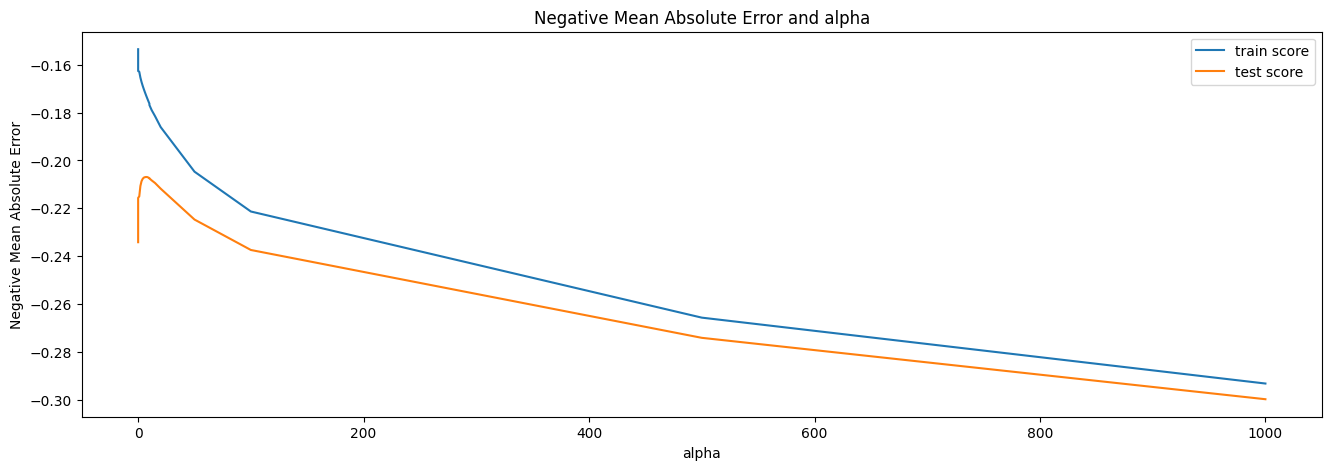

Best Alpha7.0
R2 SCORE train 0.937
R2 SCORE test  0.9095
RSS of test 39.638
RSS of train 64.2773
The MSE of the model on the train dataset for optimum alpha is 0.063
The MSE of the model on the test dataset for optimum alpha is 0.0905


In [42]:
print("Ridge Regression Model")
final_ridge,metric_ridge = ModelLassoandRidge(15,'ridge',X_train,y_train,X_test,y_test)

RIDGE ASSUMPTION VERFICATION

Text(0, 0.5, 'Error')

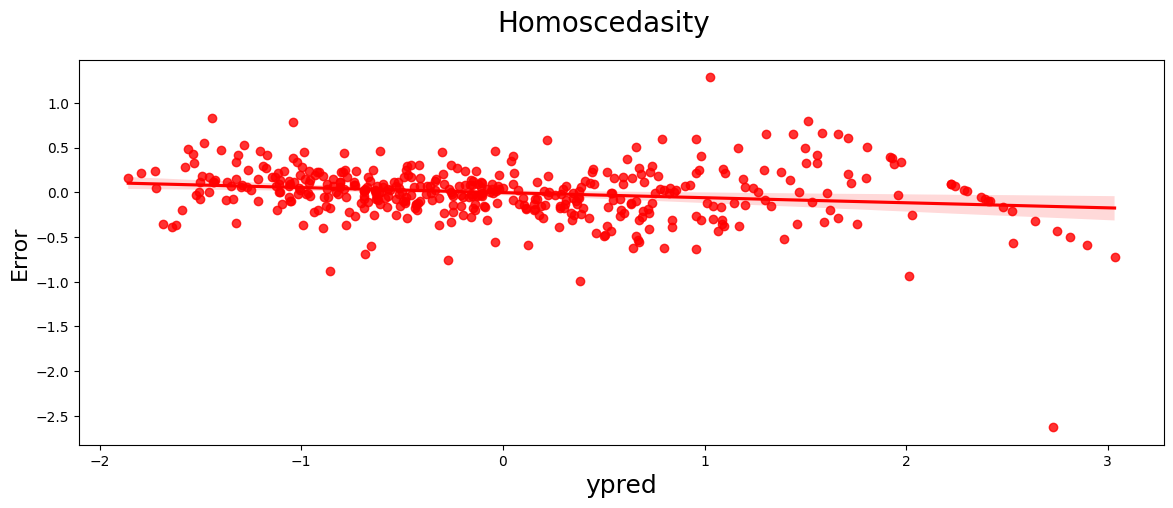

In [43]:
# Plot for Homoscedasity
y_pred_train = final_ridge.predict(X_train)
y_pred_test = final_ridge.predict(X_test)
fig = plt.figure(figsize=(14,5))
sns.regplot(x=y_pred_test, y=y_test-y_pred_test,  color="red", marker='o')
fig.suptitle('Homoscedasity', fontsize=20)
plt.xlabel('ypred', fontsize=18)   
plt.ylabel('Error', fontsize=16)

Text(0.5, 0, 'Errors')

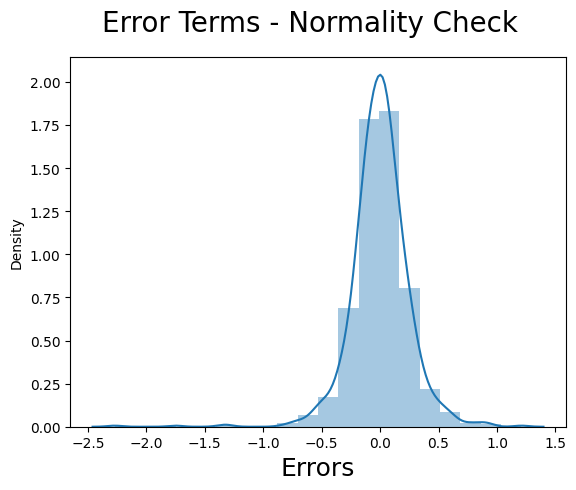

In [44]:
# Plot the error Terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms - Normality Check', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Lasso Regression Model
Fitting 15 folds for each of 32 candidates, totalling 480 fits
{'alpha': 0.001}
-0.209100587302629


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    8.5s finished


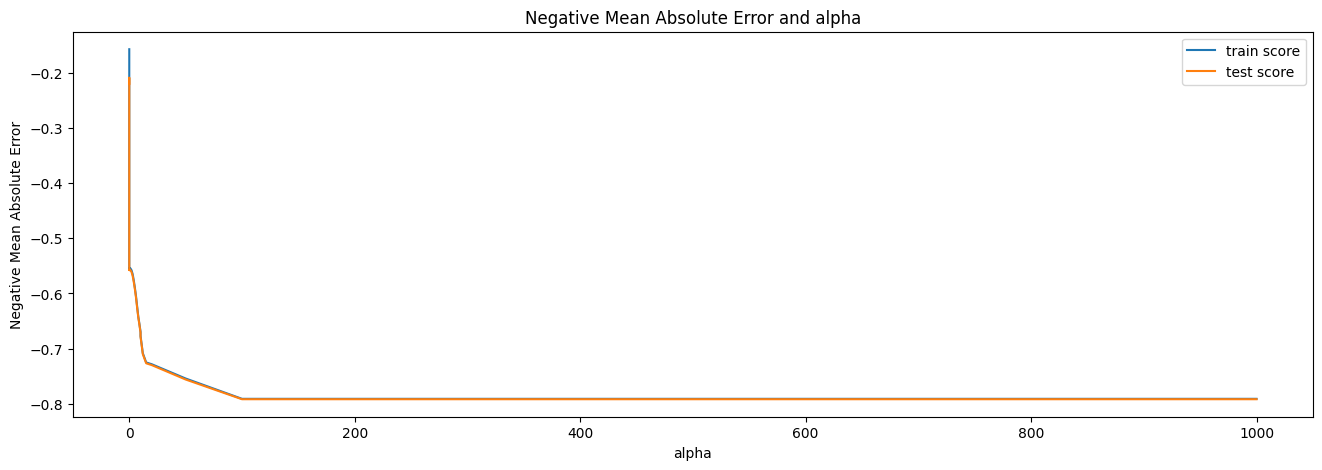

Best Alpha0.001
R2 SCORE train 0.934
R2 SCORE test  0.9105
RSS of test 39.2014
RSS of train 67.3994
The MSE of the model on the train dataset for optimum alpha is 0.066
The MSE of the model on the test dataset for optimum alpha is 0.0895


In [45]:
print("Lasso Regression Model")
final_lasso,metric_lasso=ModelLassoandRidge(15,'lasso',X_train,y_train,X_test,y_test)

**LASSO ASSUMPTION VERFICATION**

Text(0, 0.5, 'Error')

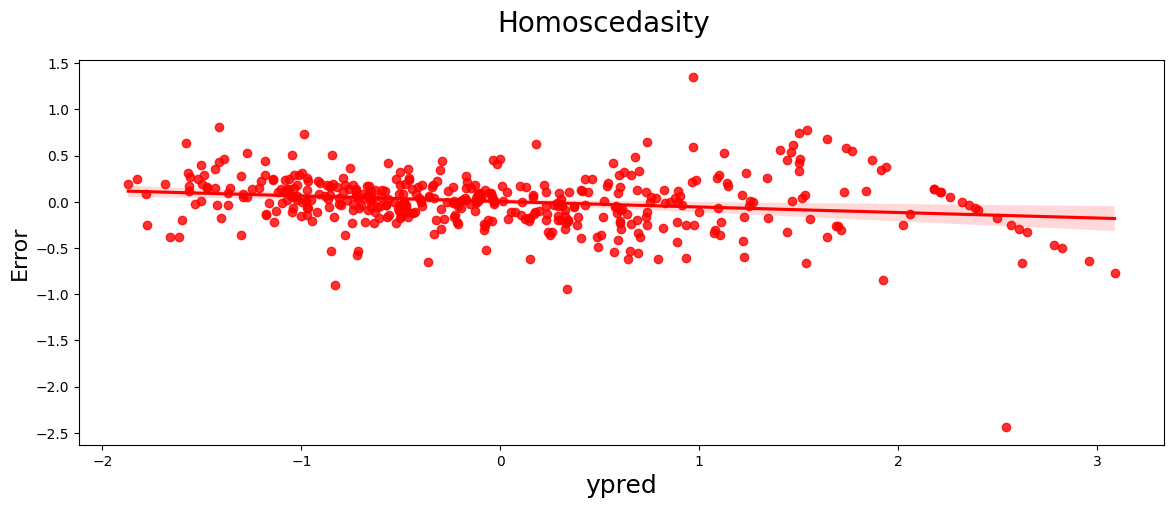

In [46]:
y_pred_train = final_lasso.predict(X_train)
y_pred_test = final_lasso.predict(X_test)
fig = plt.figure(figsize=(14,5))
sns.regplot(x=y_pred_test, y=y_test-y_pred_test,  color="red", marker='o')
fig.suptitle('Homoscedasity', fontsize=20)
plt.xlabel('ypred', fontsize=18)           
plt.ylabel('Error', fontsize=16)

Text(0.5, 0, 'Errors')

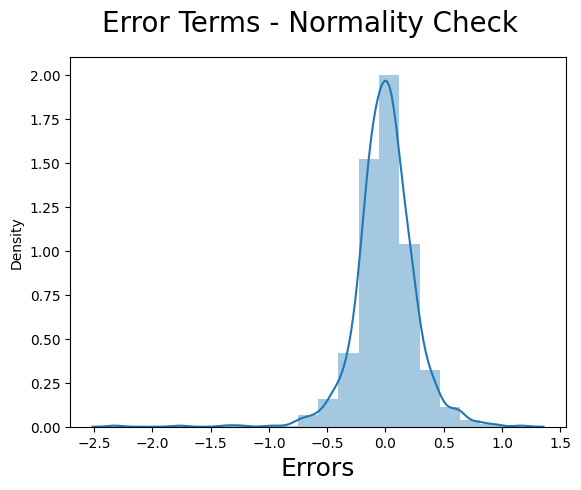

In [47]:
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms - Normality Check', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 

Conclusion on model assumption verification

Both models , Error terms are randomly distributed and there is no pattern which means the output is explained well by the model.

Errors are normally distributed is indicated by mean is 0

Error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

**Model Evaluation**

creating a table with model metrics for ridge, lasso to select the best model

In [48]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','Diffrence in R2 test and train','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression with RFE': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression with RFE'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression with RFE,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.879031,0.937045,0.933987
1,R2 Score (Test),0.818392,0.909502,0.910499
2,Diffrence in R2 test and train,0.060639,0.027542,0.023488
3,RSS (Train),123.509374,64.277327,67.399414
4,RSS (Test),79.544428,39.638019,39.201411
5,MSE (Train),0.120969,0.062955,0.066013
6,MSE (Test),0.181608,0.090498,0.089501


- Lasso R2 value is higher  than linear regression and ridge regression
- Difference in R2 for test and train is the least for the lasso regression
- RSS for the train and test is the least for the lasso regression model
- MSE is the least for the Lasso regression model

Althought the ridge regression model is a good one, the lasso regression model is slightly better in terms of model evaluation metrics, Hence we choose the lasso model

**FINAL MODEL**

RIDGE : ALPHA = 7.0

LASSO: ALPHA = 0.001

Listing the betas of the features


In [49]:
betas = pd.DataFrame(index=X_train.columns)
pd.set_option('display.max_rows', None)
betas['Ridge'] = final_ridge.coef_
betas['Lasso'] = final_lasso.coef_
betas.sort_values(by=['Lasso'],ascending=False).head(50)

,Ridge,Lasso
OverallQual_Excellent,0.494044,0.739535
OverallQual_Very_Good,0.335271,0.413771
OverallCond_Excellent,0.263053,0.356583
Neighborhood_NridgHt,0.290711,0.349110
Neighborhood_Crawfor,0.248365,0.337432
GrLivArea,0.232167,0.268421
Neighborhood_StoneBr,0.169870,0.221015
GarageQual_Gd,0.115318,0.217268
Neighborhood_NoRidge,0.171287,0.212485
Functional_Typ,0.212351,0.209153


Top features influencing the sales price based on the lasso model as below


In [50]:
betas.sort_values(by=['Lasso'],ascending=False).head(10)

,Ridge,Lasso
OverallQual_Excellent,0.494044,0.739535
OverallQual_Very_Good,0.335271,0.413771
OverallCond_Excellent,0.263053,0.356583
Neighborhood_NridgHt,0.290711,0.349110
Neighborhood_Crawfor,0.248365,0.337432
GrLivArea,0.232167,0.268421
Neighborhood_StoneBr,0.169870,0.221015
GarageQual_Gd,0.115318,0.217268
Neighborhood_NoRidge,0.171287,0.212485
Functional_Typ,0.212351,0.209153


**CODE FOR SUBJECTIVE QUESTIONS**

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Currently the best alpha for Ridge is 10.5 and Lasso is 0.001. When we double 

In [51]:
def ModelLassoandRidgeForAlpha(folds,estimator_param,X_train,y_train,X_test,y_test,alpha):

    if estimator_param == 'ridge':
        model = Ridge(alpha = alpha)
        
    else:
        model = Lasso(alpha = alpha)

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    
    y_pred_test = model.predict(X_test)
    
    r2_train_lr = r2_score(y_train, y_pred_train)
    
    print("R2 SCORE  of train",r2_train_lr)
    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R2 SCORE of test",r2_test_lr)

    print('The MSE of the model on the train dataset for optimum alpha is',mean_squared_error(y_train, y_pred_train))
    print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_pred_test))
    
    return model





In [52]:

quetion1_model_ridge = ModelLassoandRidgeForAlpha(15,'ridge',X_train,y_train,X_test,y_test,14)

quetion1_model_lasso = ModelLassoandRidgeForAlpha(15,'lasso',X_train,y_train,X_test,y_test,0.002)

betas_q1 = pd.DataFrame(index=X_train.columns)
pd.set_option('display.max_rows', None)

betas_q1['old_Ridge'] = final_ridge.coef_
betas_q1['old_Lasso'] = final_lasso.coef_

betas_q1['new_Ridge'] = quetion1_model_ridge.coef_
betas_q1['new_Lasso'] = quetion1_model_ridge.coef_



betas_q1.sort_values(by=['new_Lasso'],ascending=False).head(50)

R2 SCORE  of train 0.9308615748874154
R2 SCORE of test 0.9112205870300983
The MSE of the model on the train dataset for optimum alpha is 0.06913842511258467
The MSE of the model on the test dataset for optimum alpha is 0.0887794129699016
R2 SCORE  of train 0.9246532838012312
R2 SCORE of test 0.9137765103046329
The MSE of the model on the train dataset for optimum alpha is 0.07534671619876872
The MSE of the model on the test dataset for optimum alpha is 0.08622348969536701


,old_Ridge,old_Lasso,new_Ridge,new_Lasso
OverallQual_Excellent,0.494044,0.739535,0.396409,0.396409
OverallQual_Very_Good,0.335271,0.413771,0.285099,0.285099
Neighborhood_NridgHt,0.290711,0.349110,0.254457,0.254457
GrLivArea,0.232167,0.268421,0.216077,0.216077
Neighborhood_Crawfor,0.248365,0.337432,0.214488,0.214488
OverallCond_Excellent,0.263053,0.356583,0.195964,0.195964
Functional_Typ,0.212351,0.209153,0.187451,0.187451
Exterior1st_BrkFace,0.196745,0.207969,0.164348,0.164348
Neighborhood_StoneBr,0.169870,0.221015,0.132795,0.132795
2ndFlrSF,0.125207,0.085062,0.132047,0.132047


**OBSERVATION: **

From the above two dfs we can see that as alpha is doubled, there is a slight variation in the r2 score and the magnitude of the coefficients has reduced a bit when compared to the previous alpha. This is due to the higher penalty set.

We can also observe that some of the features like SaleType_New, ScreenPorch, FullBath has completely been penalised with almost 0 coefficients

In [53]:
#Top predictors for alpha= 7 for ridge
betas_q1.sort_values(by=['new_Ridge'],ascending=False).head(5)

,old_Ridge,old_Lasso,new_Ridge,new_Lasso
OverallQual_Excellent,0.494044,0.739535,0.396409,0.396409
OverallQual_Very_Good,0.335271,0.413771,0.285099,0.285099
Neighborhood_NridgHt,0.290711,0.349110,0.254457,0.254457
GrLivArea,0.232167,0.268421,0.216077,0.216077
Neighborhood_Crawfor,0.248365,0.337432,0.214488,0.214488


In [54]:
#Top predictors for alpha= .002 for lasso
betas_q1.sort_values(by=['new_Lasso'],ascending=False).head(5)

,old_Ridge,old_Lasso,new_Ridge,new_Lasso
OverallQual_Excellent,0.494044,0.739535,0.396409,0.396409
OverallQual_Very_Good,0.335271,0.413771,0.285099,0.285099
Neighborhood_NridgHt,0.290711,0.349110,0.254457,0.254457
GrLivArea,0.232167,0.268421,0.216077,0.216077
Neighborhood_Crawfor,0.248365,0.337432,0.214488,0.214488


**Question 2
**
- You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [55]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','Diffrence in R2 test and train','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression with RFE': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression with RFE'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression with RFE,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.879031,0.937045,0.933987
1,R2 Score (Test),0.818392,0.909502,0.910499
2,Diffrence in R2 test and train,0.060639,0.027542,0.023488
3,RSS (Train),123.509374,64.277327,67.399414
4,RSS (Test),79.544428,39.638019,39.201411
5,MSE (Train),0.120969,0.062955,0.066013
6,MSE (Test),0.181608,0.090498,0.089501


**OBSERVATION**

- R2 score of lasso model is better
- MSE and RSS on lasso is lowest

**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [56]:
Lasso_best_columns = pd.DataFrame(betas.sort_values(by=['Lasso'],ascending=False)['Lasso'].head())
Lasso_best_columns=Lasso_best_columns.T
Lasso_best_columns.T

,Lasso
OverallQual_Excellent,0.739535
OverallQual_Very_Good,0.413771
OverallCond_Excellent,0.356583
Neighborhood_NridgHt,0.349110
Neighborhood_Crawfor,0.337432


In [57]:
Lasso_best_columns.columns

X_new_data_train = X_train.drop(Lasso_best_columns.columns,axis=1)
X_new_data_test = X_test.drop(Lasso_best_columns.columns,axis=1)

new_model_without_top_pred = ModelLassoandRidgeForAlpha(15,'lasso',X_new_data_train,y_train,X_new_data_test,y_test,0.001)

new_model_coef = pd.DataFrame(index=X_new_data_train.columns)

new_model_coef['Lasso_Coeff'] = new_model_without_top_pred.coef_

new_model_coef.sort_values(by=['Lasso_Coeff'], ascending=False,inplace=True)


new_model_coef.head(5)

R2 SCORE  of train 0.9217182750226743
R2 SCORE of test 0.8986991595823016
The MSE of the model on the train dataset for optimum alpha is 0.07828172497732565
The MSE of the model on the test dataset for optimum alpha is 0.10130084041769832


,Lasso_Coeff
SaleType_CWD,0.374921
GrLivArea,0.303786
Functional_Typ,0.261790
Exterior1st_BrkFace,0.249008
LandContour_HLS,0.224928


In [58]:
Ridge_best_columns = pd.DataFrame(betas.sort_values(by=['Ridge'],ascending=False)['Ridge'].head())
Ridge_best_columns=Ridge_best_columns.T
Ridge_best_columns.T

,Ridge
OverallQual_Excellent,0.494044
OverallQual_Very_Good,0.335271
Neighborhood_NridgHt,0.290711
OverallCond_Excellent,0.263053
Neighborhood_Crawfor,0.248365


In [59]:
Ridge_best_columns.columns

X_new_data_train = X_train.drop(Ridge_best_columns.columns,axis=1)
X_new_data_test = X_test.drop(Ridge_best_columns.columns,axis=1)

new_model_without_top_pred_ridge= ModelLassoandRidgeForAlpha(15,'ridge',X_new_data_train,y_train,X_new_data_test,y_test,7)

new_model_coef_ridge = pd.DataFrame(index=X_new_data_train.columns)

new_model_coef_ridge['Ridge_Coeff'] = new_model_without_top_pred_ridge.coef_

new_model_coef_ridge.sort_values(by=['Ridge_Coeff'], ascending=False,inplace=True)


new_model_coef_ridge.head(5)

R2 SCORE  of train 0.9237456714497327
R2 SCORE of test 0.8977690723577555
The MSE of the model on the train dataset for optimum alpha is 0.07625432855026723
The MSE of the model on the test dataset for optimum alpha is 0.10223092764224445


,Ridge_Coeff
GrLivArea,0.260837
Functional_Typ,0.248019
Exterior1st_BrkFace,0.218780
LandContour_HLS,0.215623
SaleType_CWD,0.206015


**Question 4**

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

As per Occam’s Razor , Given 2 models having similar ‘performance’ in finite test and train data we should always pick simpler models Why should we have simple models ?

**OBSERVATION**

a) In-order to make a model is robust and generalisable we use techniques like regularization and grid search cv(cross-validation). The cross - validation splits the data into train, validation and test sets so that it doesnt sneak-peak into the test data while training. We also use back testing technique to evaluate the performance of the model in unseen data.

The implication of making a robust model and a generalizable model is that it may decrease in accuracy on the training set but will result in a increase of accuracy on the test set. The robust model is very unlikely to overfit on the train data and more likely to generalize on the new data.

we should choose simple models because they are generic (less variance) and needs less training data and easy to train. Simple models are robust while complex model change too much if there is a small change in the training data . Simple models tend to have low variance but high bias.

How to make a model simple?

In case of linear regression problem, the simple model means selection of appropriate features and having lesser number of features. We can use RFE techniques combined with our business intuition to choose the right set of features and remove insignificant features. 

Simple models can have high bias and low variance. Lower variance means the model accuracy for the test and train doesnt  show significant difference hence very less overfitting can be observed. Also, extremely simple models are not advisable as model bias should be made less (accuracy should be increased). 

Hence we can do a cautious call based on the bias-variance trade off.Simpler models are more likely to be correct because they capture the esssence of the problem without overcomplicating it.